<a href="https://colab.research.google.com/github/JakeOh/202504_itwill_oracle88/blob/main/python24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab에서 한글 폰트 사용하기

## Step 1. 한글 폰트 설치

In [1]:
# Jupyter notebook 환경에서 리눅스 명령어를 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,542 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and dire

## Step 2. Colab Runtime 재시작(Ctrl+M)

## Step 3. matplotlib 패키지에서 한글 폰트를 사용할 수 있도록 설정

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

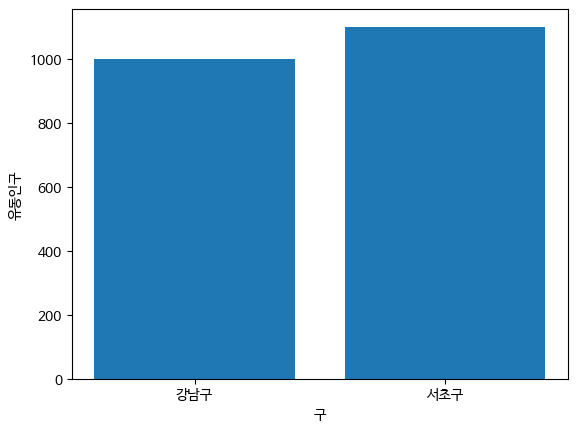

In [2]:
# 한글 폰트 테스트
import pandas as pd

df = pd.DataFrame({
    '구': ['강남구', '서초구'],
    '유동인구': [1_000, 1_100]
})

plt.bar(x=df['구'], height=df['유동인구'])
plt.xlabel('구')
plt.ylabel('유동인구')
plt.show()

# 2025년 4월 전국 아파트 실거래가 분석

*   [apt_201910.csv](https://github.com/JakeOh/202504_itwill_oracle88/raw/refs/heads/main/apt_202504.csv) 파일을 읽고 DataFrame 생성
    *   encoding 파라미터 설정
    *   첫 15줄은 파일에 대한 설명 -> skip
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
    *   '강원도 강릉시 견소동' -> '강원도'
*   '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
    *   202504 -> 2025, 4
*    서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*    도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력

## 필요 패키지 import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터프레임 생성

In [4]:
file_path = 'https://github.com/JakeOh/202504_itwill_oracle88/raw/refs/heads/main/apt_202504.csv'

In [5]:
apt = pd.read_csv(file_path, skiprows=15, encoding='euc-kr', thousands=',')
# skiprows 파라미터: 파일에서 생략하고 넘어가는 줄 수.
# encoding 파라미터: 텍스트 파일의 인코딩 타입을 설정. (예) utf-8(Linux, MacOS), cp949(한글 Windows), euc-kr, ...
# thousands 파라미터: 숫자 자료에서 천자리 구분자가 사용되고 있을 때. (예) 10,000

In [6]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,-,3,개인,개인,1983,길주남로90번길 45,-,중개거래,인천 부평구,-
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,-,23,개인,개인,2023,인하로222번길 20,-,중개거래,인천 미추홀구,-
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,-,22,개인,개인,2021,염전로 414,-,중개거래,인천 미추홀구,-
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,-,직거래,-,25.04.30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,-,20,개인,개인,1997,제기로 131,-,중개거래,서울 동대문구,-


In [7]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36974 entries, 0 to 36973
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NO        36974 non-null  int64  
 1   시군구       36974 non-null  object 
 2   번지        36973 non-null  object 
 3   본번        36974 non-null  int64  
 4   부번        36974 non-null  int64  
 5   단지명       36974 non-null  object 
 6   전용면적(㎡)   36974 non-null  float64
 7   계약년월      36974 non-null  int64  
 8   계약일       36974 non-null  int64  
 9   거래금액(만원)  36974 non-null  int64  
 10  동         36974 non-null  object 
 11  층         36974 non-null  int64  
 12  매수자       36974 non-null  object 
 13  매도자       36974 non-null  object 
 14  건축년도      36974 non-null  int64  
 15  도로명       36974 non-null  object 
 16  해제사유발생일   36974 non-null  object 
 17  거래유형      36974 non-null  object 
 18  중개사소재지    36974 non-null  object 
 19  등기일자      36974 non-null  object 
dtypes: float64(1), int64(8), obj

In [8]:
apt.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도
count,36974.000000,36974.000000,36974.000000,36974.000000,36974.0,36974.000000,3.697400e+04,36974.000000,36974.000000
mean,18487.500000,820.122951,3.142587,73.912814,202504.0,14.394088,4.348493e+04,10.057040,2006.137664
std,10673.618763,710.453648,38.857493,22.468251,0.0,8.364038,4.163910e+04,6.925089,10.891869
min,1.000000,0.000000,0.000000,12.210000,202504.0,1.000000,1.200000e+03,-2.000000,1962.000000
25%,9244.250000,366.000000,0.000000,59.840000,202504.0,7.000000,1.820000e+04,5.000000,1997.000000
50%,18487.500000,703.000000,0.000000,75.532800,202504.0,14.000000,3.370000e+04,9.000000,2006.000000
75%,27730.750000,1080.000000,1.000000,84.950000,202504.0,21.000000,5.550000e+04,14.000000,2017.000000
max,36974.000000,7346.000000,5001.000000,244.470000,202504.0,30.000000,1.050000e+06,79.000000,2025.000000


# 데이터 탐색 시각화

아파트 전용 면적 분포 시각화

In [10]:
apt['전용면적(㎡)'].describe()

,전용면적(㎡)
count,36974.000000
mean,73.912814
std,22.468251
min,12.210000
25%,59.840000
50%,75.532800
75%,84.950000
max,244.470000


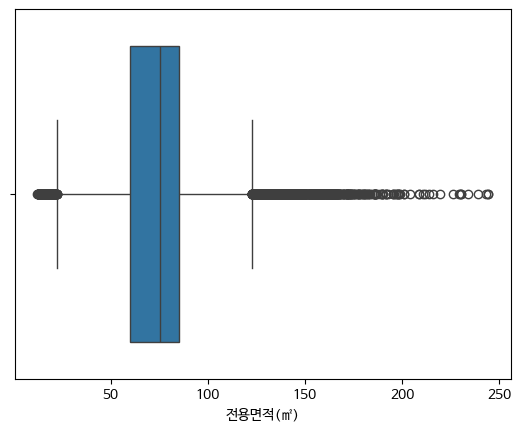

In [11]:
sns.boxplot(data=apt, x='전용면적(㎡)')
plt.show()

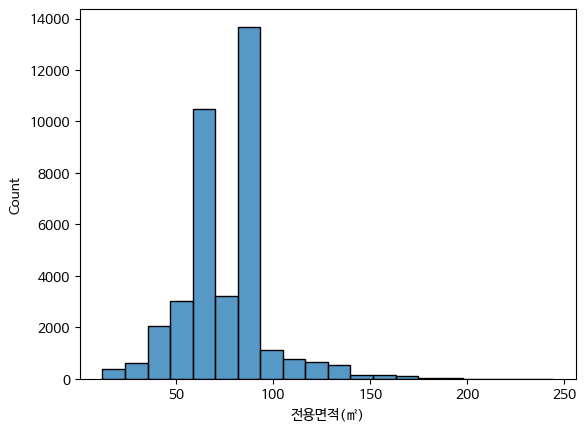

In [16]:
sns.histplot(data=apt, x='전용면적(㎡)', bins=20)
plt.show()

거래 금액 분포 시각화

In [17]:
apt['거래금액(만원)'].describe()

,거래금액(만원)
count,3.697400e+04
mean,4.348493e+04
std,4.163910e+04
min,1.200000e+03
25%,1.820000e+04
50%,3.370000e+04
75%,5.550000e+04
max,1.050000e+06


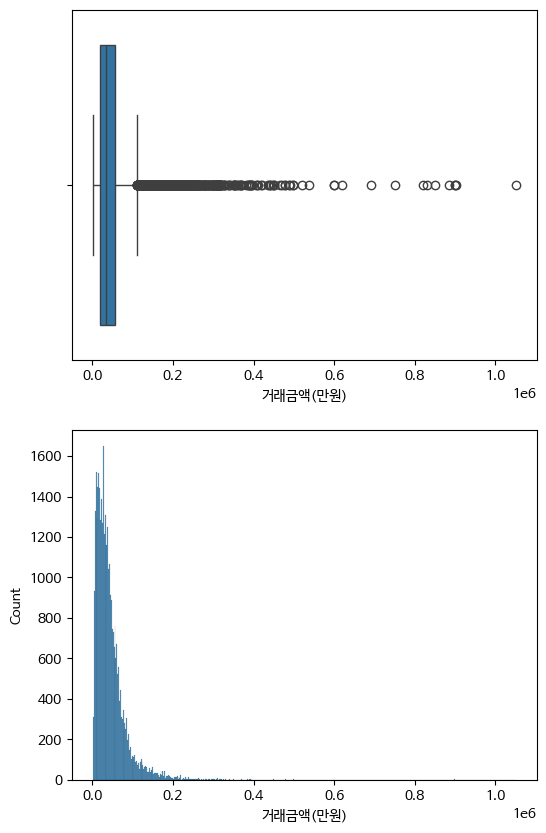

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 10))

sns.boxplot(data=apt, x='거래금액(만원)', ax=axes[0])
sns.histplot(data=apt, x='거래금액(만원)', ax=axes[1])

plt.show()

# 거래유형 빈도수

In [26]:
apt['거래유형'].value_counts()

,count
거래유형,
중개거래,33765
직거래,3209


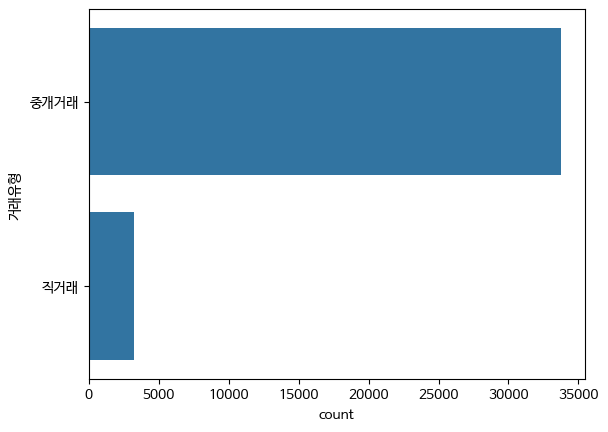

In [28]:
sns.countplot(data=apt, y='거래유형')
plt.show()